In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread,imshow
from skimage import exposure
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np


In [2]:
image=imread("manga.png")

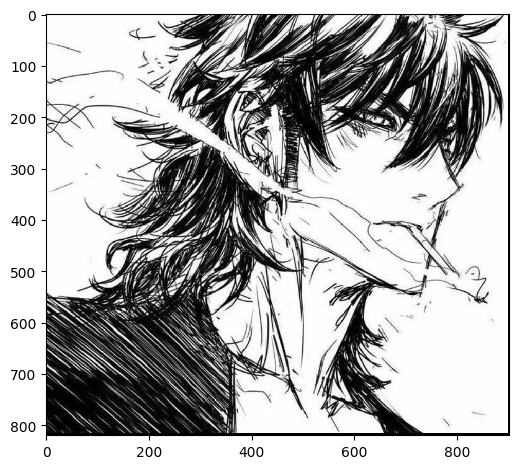

In [3]:
imshow(image)

In [4]:
def hister(image):
    _,axis=plt.subplots(ncols=2,figsize=(12,3))
    if (image.ndim==2):
        axis[0].imshow(image,cmap=plt.get_cmap('gray'))
        axis[1].set_title('Histogram')
        axis[0].set_title('Grayscale Image')
        hist=exposure.histogram(image)
        axis[1].plot(hist[0])
    else:
        #Color image
        axis[0].imshow(image,cmap='gray')
        axis[1].set_title('Histogram')
        axis[0].set_title('Colored Image')
        rgbcolors=['red','green','blue']
        for i,mycolor in enumerate(rgbcolors):
            axis[1].plot(exposure.histogram(image[...,i])[0],color=mycolor)

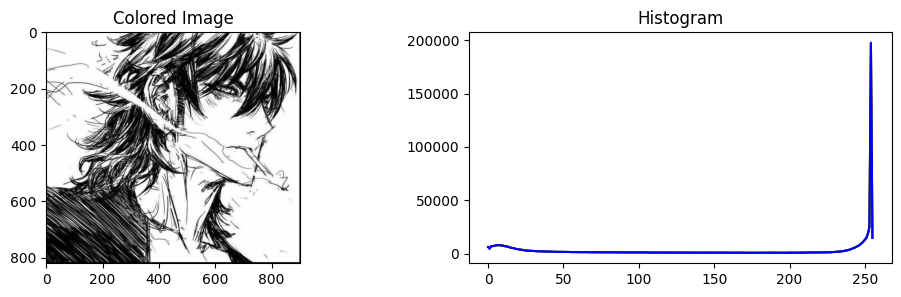

In [5]:
hister(image)

On peut donc déduire que malgré les apparences il s'agissait d'une image de type niveau de gris.

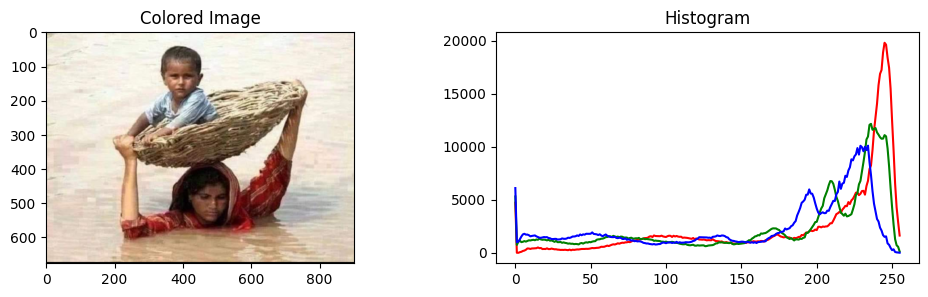

In [6]:
img=imread("Homelander.png")
hister(img)

On peut aisement déduire que cette image de couleur est fortement dominé par le canal de la couleur rouge qui présente plus de pixel avec cette intensité.

In [7]:
#On peut jouer à  mettre en noir et blanc nos images en binarisant les pixels
image1=np.where(image>128/256,0,1)
image1[image1<128/256]=0
image1[image1>128/256]=1
#imshow(image1,cmap=plt.get_cmap('gray'))

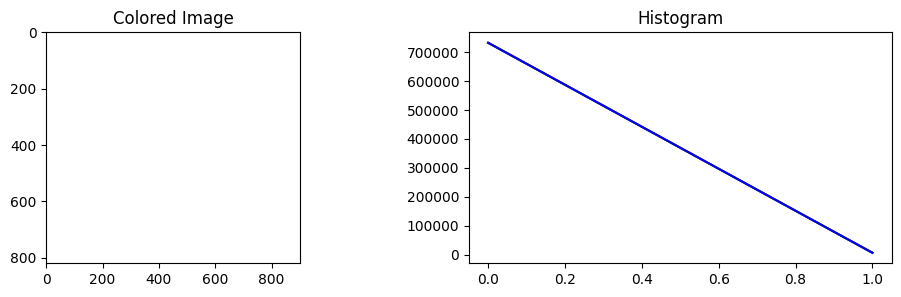

In [8]:
hister(image1)
#trouver le point qui servira à binariser et non mettre 128 à chaque tentative car la valeur du pixel varie en fonction de l'image

In [9]:
print(image)

[[[254 254 254 255]
  [254 254 254 255]
  [254 254 254 255]
  ...
  [247 247 247 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[254 254 254 255]
  [254 254 254 255]
  [254 254 254 255]
  ...
  [253 253 253 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[254 254 254 255]
  [254 254 254 255]
  [254 254 254 255]
  ...
  [255 255 255 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 ...

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]]


In [10]:
print(image1)

[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [1 1 1 0]
  [1 1 1 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [1 1 1 0]
  [1 1 1 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [1 1 1 0]
  [1 1 1 0]]

 ...

 [[1 1 1 0]
  [1 1 1 0]
  [1 1 1 0]
  ...
  [1 1 1 0]
  [1 1 1 0]
  [1 1 1 0]]

 [[1 1 1 0]
  [1 1 1 0]
  [1 1 1 0]
  ...
  [1 1 1 0]
  [1 1 1 0]
  [1 1 1 0]]

 [[1 1 1 0]
  [1 1 1 0]
  [1 1 1 0]
  ...
  [1 1 1 0]
  [1 1 1 0]
  [1 1 1 0]]]


# Seuillage

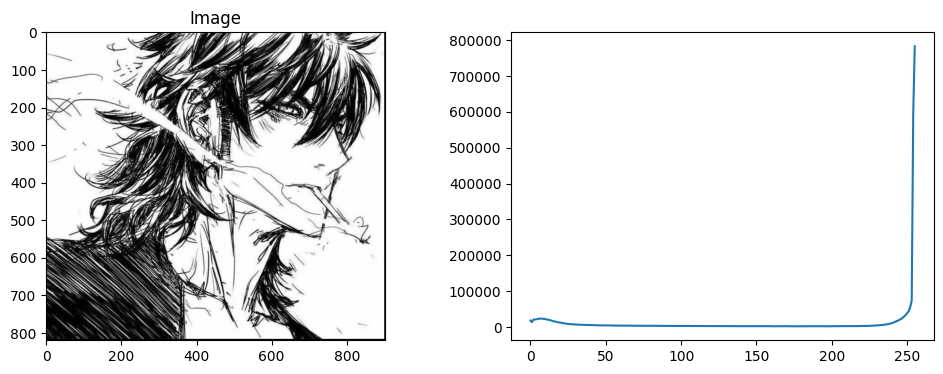

In [11]:
def histGrayScale(img,_xlim=255,_ylim=2400):
    _,axes=plt.subplots(ncols=2,figsize=(12,4))
    ax=axes.ravel()
    ax[0].imshow(img,cmap=plt.get_cmap('gray'))
    ax[0].set_title('Image')
    hist=exposure.histogram(img)
    ax[1].plot(hist[0])

    #better display
    #ax[1].set_xlim([0,_xlim])
    #ax[1].set_ylim([0,_ylim])
histGrayScale(image)

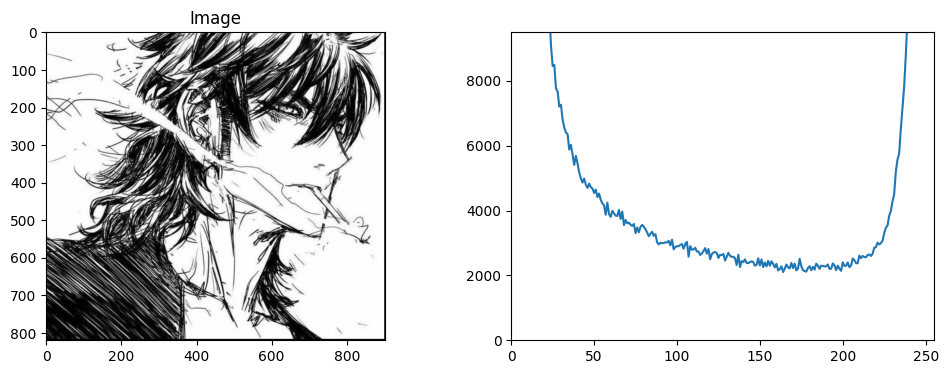

In [12]:
def histGrayScale(img,_xlim=255,_ylim=9500):
    _,axes=plt.subplots(ncols=2,figsize=(12,4))
    ax=axes.ravel()
    ax[0].imshow(img,cmap=plt.get_cmap('gray'))
    ax[0].set_title('Image')
    hist=exposure.histogram(img)
    ax[1].plot(hist[0])

    #better display
    ax[1].set_xlim([0,_xlim])
    ax[1].set_ylim([0,_ylim])
histGrayScale(image)

On peut constater quue les pixels varient entre 0 et 800,000 sur le 1er graphe et sur le 2e on voit clairement que plus de 3000 pixels ont une valeur inférieure à 50 ou supérieure à 225,tandis que le reste est compris entre 50 et 225,ce qui fait explique le gris.

In [13]:
image2=image.copy()
image2[(image2<=225)]=1

In [14]:
image2

array([[[254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        ...,
        [247, 247, 247, 255],
        [  1,   1,   1, 255],
        [  1,   1,   1, 255]],

       [[254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        ...,
        [253, 253, 253, 255],
        [  1,   1,   1, 255],
        [  1,   1,   1, 255]],

       [[254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        ...,
        [255, 255, 255, 255],
        [  1,   1,   1, 255],
        [  1,   1,   1, 255]],

       ...,

       [[  1,   1,   1, 255],
        [  1,   1,   1, 255],
        [  1,   1,   1, 255],
        ...,
        [  1,   1,   1, 255],
        [  1,   1,   1, 255],
        [  1,   1,   1, 255]],

       [[  1,   1,   1, 255],
        [  1,   1,   1, 255],
        [  1,   1,   1, 255],
        ...,
        [  1,   1,   1, 255],
        [  1,   1,   1, 255],
        [  1,   1,   1, 255]],

       [[  1

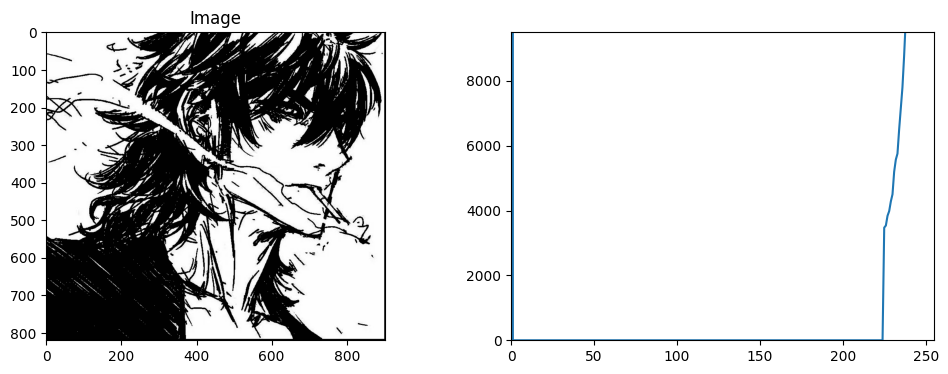

In [15]:
histGrayScale(image2)

In [16]:
image3=image.copy()
image3[(image3>=50)]=1

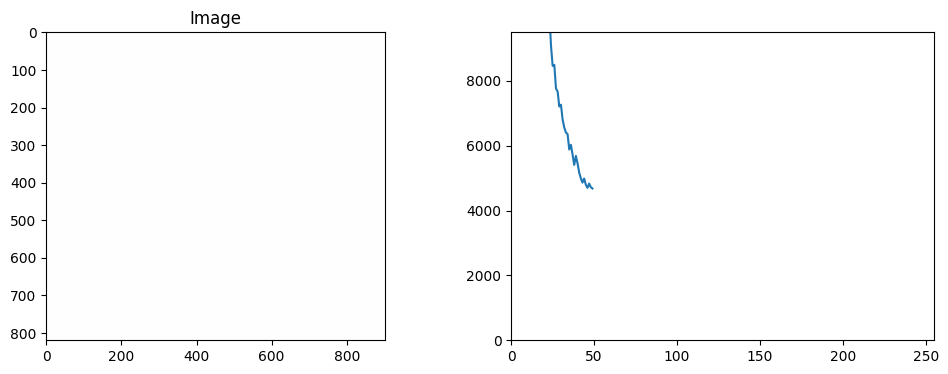

In [17]:
histGrayScale(image3)

In [18]:
image4=image.copy()
image4[(image4>=50)&(image4<=225)]=1

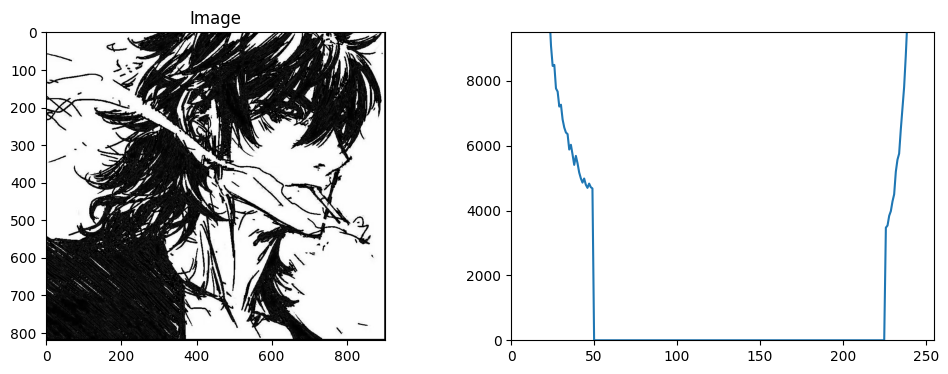

In [19]:
histGrayScale(image4)

In [20]:
image5=image.copy()
image5[(image5<50)|(image5>225)]=1

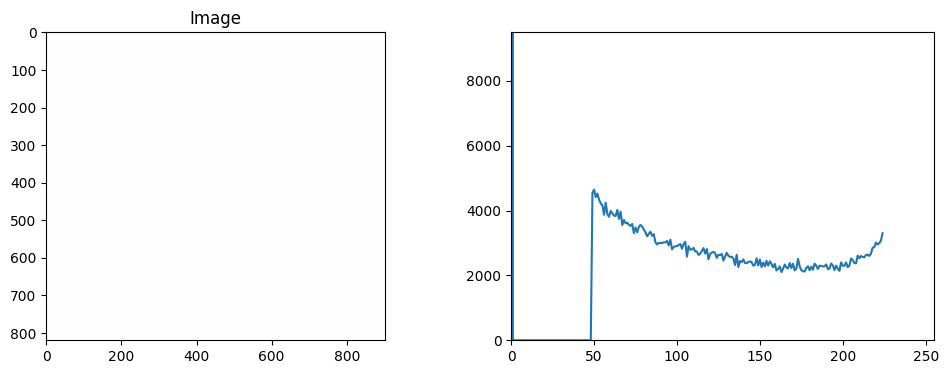

In [21]:
histGrayScale(image5)

In [22]:
#Seuillage proprement dit(moyenne,mediane,quartile)
import pandas as pd
def RGBStats(image):
    colors=[]
    for i in range(0,3):
        max_color=int(np.max(image[:,:,i]))
        print("Max",max_color,image[:,:,i])
        min_color=int(np.min(image[:,:,i]))
        print("Min",min_color)
        mean_color=int(np.mean(image[:,:,i]))
        median_color=int(np.median(image[:,:,i]))
        row=(min_color,max_color,mean_color,median_color)
        colors.append(row)
        print("Colors",colors)
    df=pd.DataFrame(colors,
                        index=['Red','Green','Blue'],
                        columns=['Min','Max','Mean','Median'])
    print(df)
    return df
RGBStats(img)

Max 255 [[  0 230 231 ... 246   0   0]
 [  0 224 223 ... 245   0   0]
 [  0 216 214 ... 243   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Min 0
Colors [(0, 255, 196, 227)]
Max 255 [[  0 223 225 ... 229   0   0]
 [  0 218 217 ... 228   0   0]
 [  0 210 208 ... 227   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Min 0
Colors [(0, 255, 196, 227), (0, 255, 178, 211)]
Max 255 [[  0 203 204 ... 240   0   0]
 [  0 195 195 ... 238   0   0]
 [  0 186 184 ... 236   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Min 0
Colors [(0, 255, 196, 227), (0, 255, 178, 211), (0, 255, 163, 195)]
       Min  Max  Mean  Median
Red      0  255   196     227
Green    0  255   178     211
Blue     0  255   163     195


Min  Max  Mean  Median
Red      0  255   196     227
Green    0  255   178     211
Blue     0  255   163     195

In [25]:
#Seuillage binaire
%matplotlib inline
from skimage.filters import threshold_mean,threshold_otsu
plt_image=np.array(imread("manga.png"),dtype="uint8")[:,:,3]
plt_img=np.array(imread("Homelander.png"),dtype="float32")[:,:,3]
plt_image=plt.imread("manga.png")
#image_flt=image.astype(np.float32)
def thresoldMeanDisplay(image):
    thresh=threshold_mean(image)
    print(thresh)
    thresh_test=50
    binary=image>thresh_test
    binary=binary.astype('int')

    #print(binary)
    fig,axes=plt.subplots(ncols=2,figsize=(8,3))
    ax=axes.ravel()
    #print(ax[0].imshow(image))
    ax[0].imshow(image)
    ax[0].set_title('Original')
    ax[1].imshow(binary,cmap=plt.cm.gray)
    ax[1].set_title('Mean thresolded')

#thresoldMeanDisplay(new_img)

In [26]:
new_img=imread('Guts.jpg')
def thresholdOtsuDisplay(image):
    thresh=threshold_otsu(image)
    binary=image>thresh
    #binary=binary.astype('int')
    fig,axes=plt.subplots(ncols=2,figsize=(8,3))
    ax=axes.ravel()
    ax[0].imshow(image,cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[1].imshow(binary,cmap=plt.cm.gray)
    ax[1].set_title('Otsu thresolded')

threshold_otsu(new_img)

<ipython-input-26-eb2cf340e44d>:13: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (656, 1024, 3) looks like that of an RGB image.
  threshold_otsu(new_img)


122

In [27]:
image.dtype

dtype('uint8')

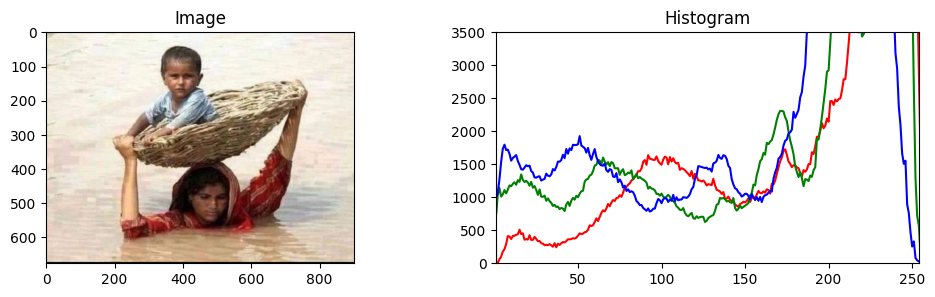

In [29]:
#Image couleur
def histColor(img):
 _,axes=plt.subplots(ncols=2,figsize=(12,3))
 axes[0].imshow(img)
 axes[0].set_title('Image')
 axes[1].set_title('Histogram')
 axes[1].plot(exposure.histogram(img[...,0])[0],color='red')
 axes[1].plot(exposure.histogram(img[...,1])[0],color='green')
 axes[1].plot(exposure.histogram(img[...,2])[0],color='blue')
 axes[1].set_xlim([1,254])
 axes[1].set_ylim([0,3500])

histColor(img)

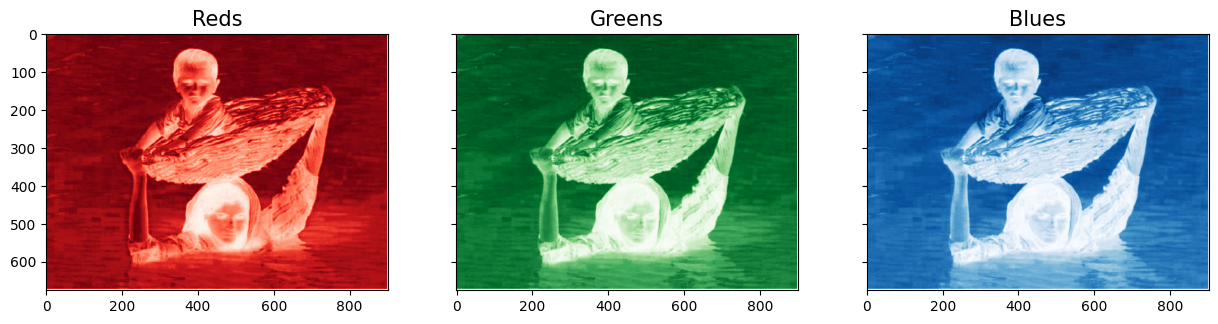

In [30]:
rgb=['Reds','Greens','Blues']
_,axes=plt.subplots(1,3,figsize=(15,5),sharey=True)
for i in range(3):
  axes[i].imshow(img[:,:,i],cmap=rgb[i])
  axes[i].set_title(rgb[i],fontsize=15)

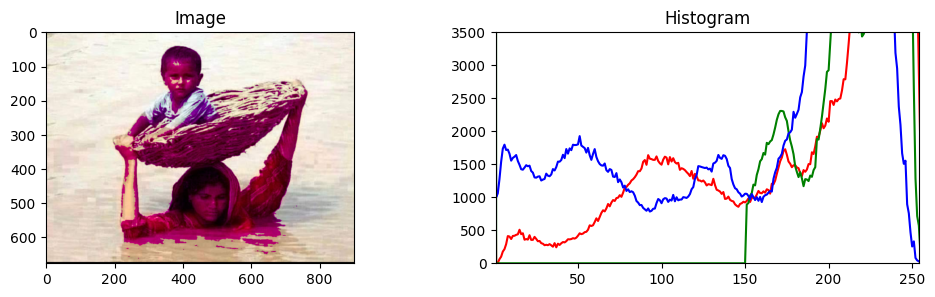

In [31]:
#Un seuillage a été effectué sur le canal 'vert' uniquement
thresold_G=150
image_mutated=img.copy()
image_mutated[:,:,1]=np.where(img[:,:,1]>thresold_G,
                              img[:,:,1],
                              0)

histColor(image_mutated)

# TRANSFORMATIONS DE BASE

In [32]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import exposure ,transform
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


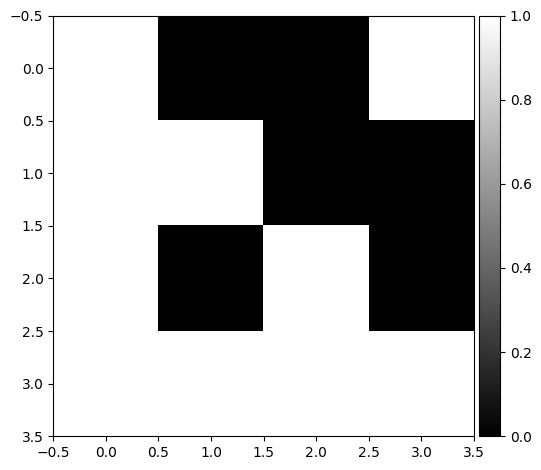

In [36]:
image_test=np.array([[1,0,0,1],
                     [1,1,0,0],
                     [1,0,1,0],
                     [1,1,1,1]])
imshow(image_test,cmap=plt.get_cmap('gray'))

In [38]:
rotated=transform.rotate(image_test,angle=45,preserve_range=True)
print(rotated)

[[0.         0.18933983 0.18933983 0.        ]
 [0.27512627 0.39644661 0.39644661 0.27512627]
 [0.98223305 0.60355339 0.60355339 0.98223305]
 [0.37867966 0.93198052 0.93198052 0.37867966]]


Text(0.5, 1.0, 'Rotated Image')

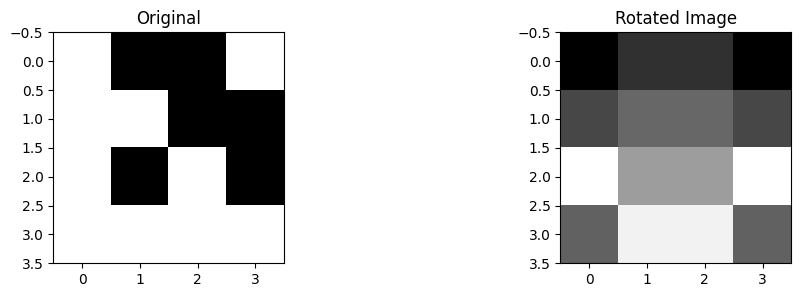

In [44]:
_,axes=plt.subplots(ncols=2,figsize=(12,3))
axes[0].imshow(image_test,cmap=plt.get_cmap('gray'))
axes[0].set_title('Original')
axes[1].imshow(rotated,cmap=plt.get_cmap('gray'))
axes[1].set_title('Rotated Image')

In [55]:
resized_img=transform.resize(image_test,output_shape=(3,3),preserve_range=True)
print(resized_img)

[[0.8611111  0.08333336 0.69444441]
 [0.91666666 0.5        0.08333336]
 [0.97222222 0.91666666 0.8611111 ]]


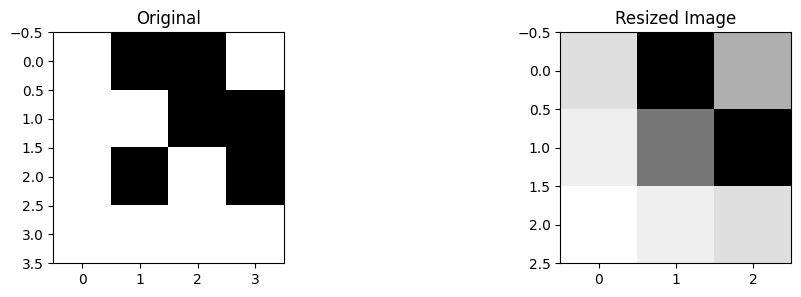

In [56]:
_,axes=plt.subplots(ncols=2,figsize=(12,3))
axes[0].imshow(image_test,cmap=plt.get_cmap('gray'))
axes[0].set_title('Original')
axes[1].imshow(resized_img,cmap=plt.get_cmap('gray'))
axes[1].set_title('Resized Image')
plt.show()

On peut constater que l'emplacement des pixels a radicalement changé tout en conservant la structure globale de l'image.

Text(0.5, 1.0, 'Rescaled Image')

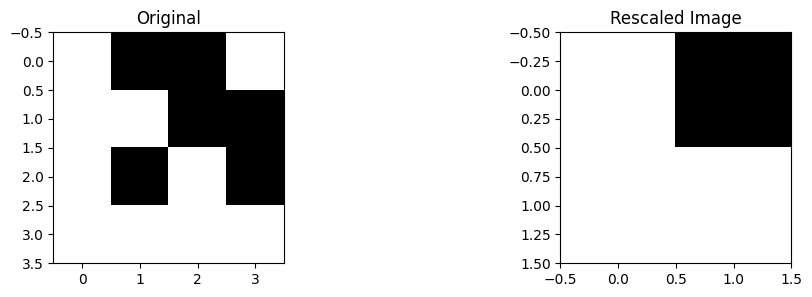

In [59]:
image_rescaled=transform.rescale(image_test,scale=1.0/2.0,anti_aliasing=False,preserve_range=True)
_,axes=plt.subplots(ncols=2,figsize=(12,3))
axes[0].imshow(image_test,cmap=plt.get_cmap('gray'))
axes[0].set_title('Original')
axes[1].imshow(image_rescaled,cmap=plt.get_cmap('gray'))
axes[1].set_title("Rescaled Image")

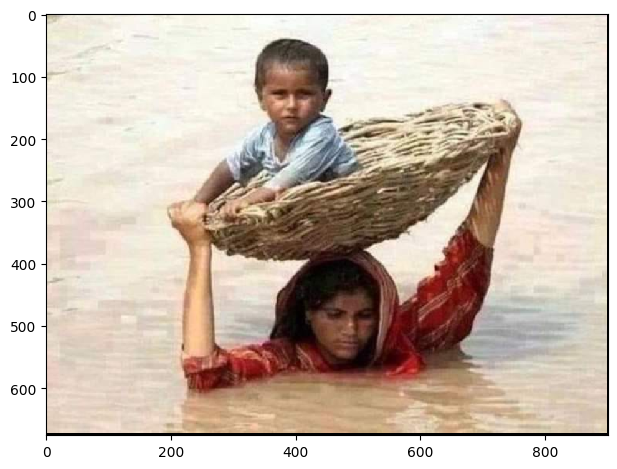

In [60]:
#Transformation Euclidienne
imshow(img)

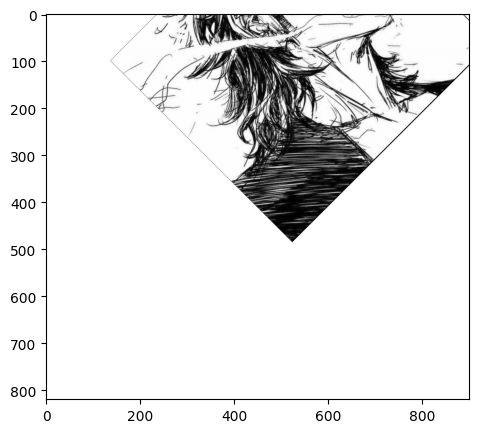

In [62]:
tr=transform.SimilarityTransform(scale=1.5,rotation=math.pi/4,translation=(-40,-250))
plt.figure(figsize=(8,5))
image_tr_1=transform.warp(image,tr)
plt.imshow(image_tr_1)

# TRANSFORMATIONS MORPHOLOGIQUES

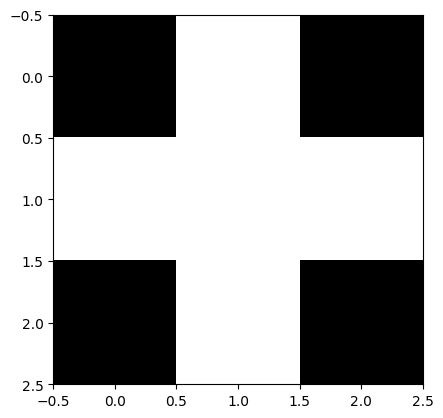

In [64]:
#Les gabarits
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
from skimage import morphology
from matplotlib.pyplot import imshow ,get_cmap
imshow(morphology.disk(1),cmap=get_cmap('gray'))

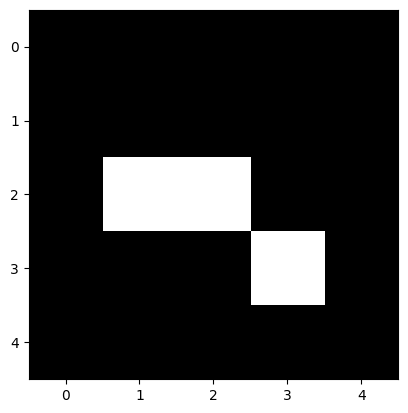

In [73]:
#Dilatation :Elargir une image ,la longueur et la largeur ont pour dimension la somme de celle du gabarit et de l'image inittiale.
image_test=np.array([[0,0,0,0,0],
                    [0,0,0,0,0],
                    [0,1,1,0,0],
                    [0,0,0,1,0],
                    [0,0,0,0,0]])
imshow(image_test,cmap=get_cmap('gray'))

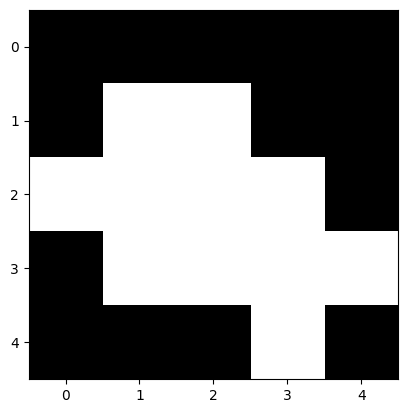

In [74]:
dilatation=morphology.binary_dilation(image=image_test,
                                      footprint=morphology.disk(1))
imshow(dilatation,cmap=get_cmap('gray'))


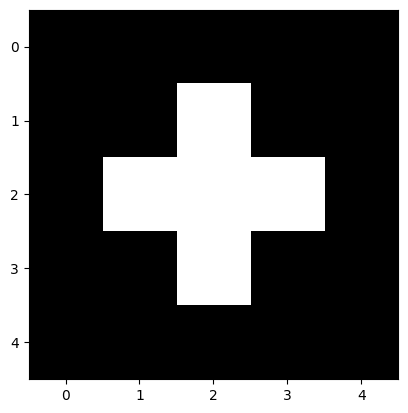

In [76]:
#L'Erosion :pour séparer des éléments collés sur une image
image_test=np.array([[0,0,0,0,0],
                     [0,0,1,0,0],
                     [0,1,1,1,0],
                     [0,0,1,0,0],
                     [0,0,0,0,0]])
imshow(image_test,cmap=get_cmap('gray'))

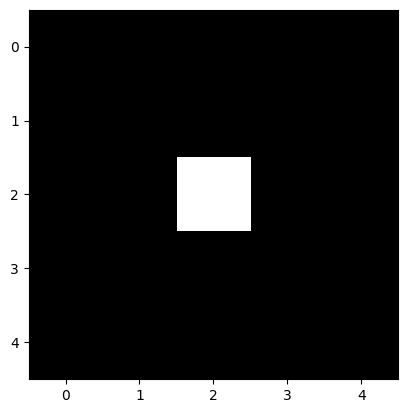

In [77]:
erosion=morphology.binary_erosion(image_test,
                                  morphology.disk(1))
imshow(erosion,cmap=get_cmap('gray'))

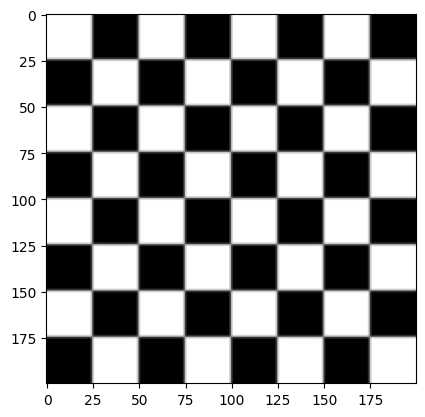

In [79]:
#Ouverture :EROSION+ DILATATION
#Fermeture: DILATATION + EROSION
img=data.checkerboard()
imshow(img,cmap=get_cmap('gray'))

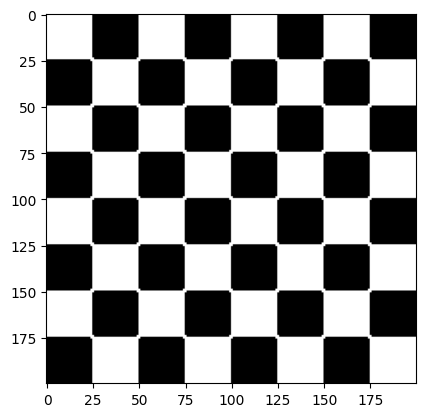

In [80]:
erosion=morphology.binary_erosion(img,morphology.disk(1))
imshow(erosion,cmap=get_cmap('gray'))

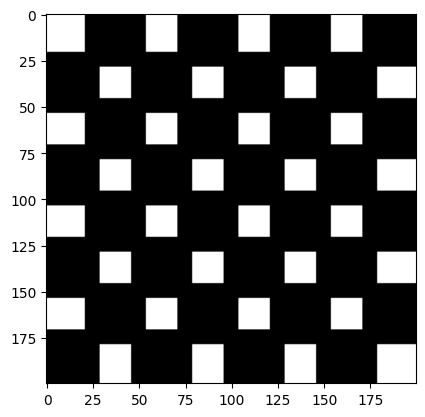

In [81]:
erosion=data.checkerboard()
for i in range(5):
  erosion=morphology.binary_erosion(erosion,morphology.disk(1))
imshow(erosion,cmap=get_cmap('gray'))

Augmentation du nombre de pixels noirs.

# CONVOLUTION

In [82]:
import numpy as np
from skimage import data
import matplotlib as plt
from scipy import signal
from matplotlib.pyplot import imshow ,get_cmap
import matplotlib.pyplot as plt

def display(img1,img2):
  _,axes=plt.subplots(ncols=2)
  axes[0].imshow(img1,cmap=plt.get_cmap('gray'))
  axes[1]=imshow(img2,cmap=plt.get_cmap('gray'))

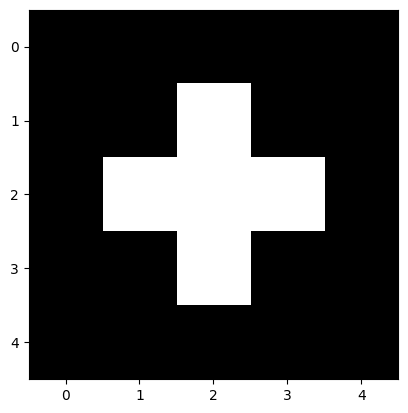

In [84]:
image_test=np.array([[0,0,0,0,0],
                     [0,0,1,0,0],
                     [0,1,1,1,0],
                     [0,0,1,0,0],
                     [0,0,0,0,0]])

imshow(image_test,
       cmap=get_cmap('gray'))

In [85]:
kernel=np.ones((3,3),np.float32)/2

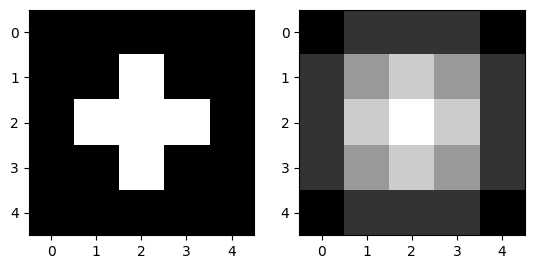

In [87]:
imgconvol=signal.convolve2d(image_test,
                             kernel,
                             mode='same',
                             boundary='fill',
                             fillvalue=0)
display(image_test,imgconvol)

In [89]:
#Detection de contour
kernel_contour=np.array([[0,1,0],
                        [1,-4,1],
                        [0,1,0],])

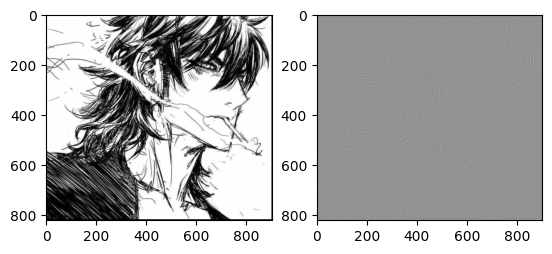

In [102]:
image=imread('manga.png',plt.get_cmap('gray'))
imgconvol=signal.convolve2d(image,
                            kernel_contour,
                            boundary='symm',
                            mode='same')
display(image,imgconvol)
imshow(imgconvol,cmap=get_cmap('gray'))

In [98]:
#Augmentatin de constraste
kernel_contrast=np.array([[0,0,0,0,0],
                          [0,0,-1,0,0],
                          [0,-1,5,-1,0],
                          [0,0,-1,0,0],
                          [0,0,0,0,0],])

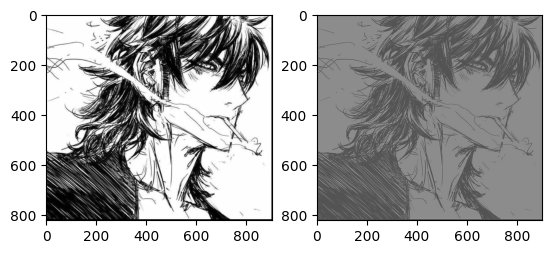

In [100]:
imgcontrast=signal.convolve2d(image,
                            kernel_contrast,
                            boundary='symm',
                            mode='same')
display(image,imgcontrast)

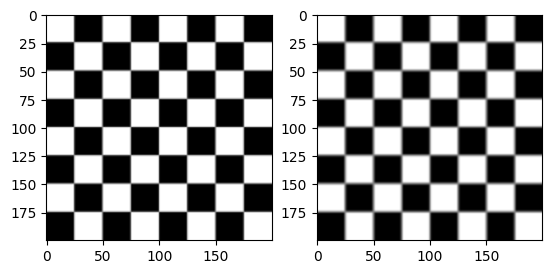

In [105]:
#Flouttage
kernel=np.array([[0,0,0,0,0],
                 [0,1,1,1,0],
                 [0,1,1,1,0],
                 [0,1,1,1,0],
                 [0,0,0,0,0],])
img=signal.convolve2d(data.checkerboard(),
                     kernel,
                     boundary='symm',
                     mode='same')
display(data.checkerboard(),img)

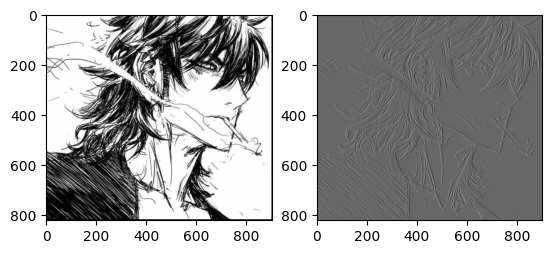

In [106]:
#Renforcement de bords
kernel=np.array([[0,0,0],
                 [-1,1,0],
                 [0,0,0]])
img=signal.convolve2d(image,
                      kernel,
                      boundary='symm',
                      mode='same',
                      )
display(image,img)

Ces différent chapitre développé par *Benoit Cayla* m'ont permis d'appréhender les mécanisme du traitement de l'image.